Week 4 — Data Acquisition & Description
Importing all necessary and Collection of Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.sparse import hstack
from sklearn.compose import ColumnTransformer
import seaborn as sns
from sklearn.model_selection import GridSearchCV #for hypertuning
from sklearn.linear_model import LinearRegression,LogisticRegression, Lasso, Ridge
from lightgbm import LGBMRegressor


Importing csv File

In [2]:
# Uploading A csv file
import os, pandas as pd

# CANDIDATES = ["exams.csv", "./exams.csv", "/content/exams.csv", "/mnt/data/exams.csv"]
# df = None
# for p in CANDIDATES:
#     if os.path.exists(p):
#         df = pd.read_csv(p); print(f"Loaded: {p}"); break

# if df is None:
try:
    from google.colab import files
    up = files.upload()
    fname = next(iter(up.keys()))
    # df = pd.read_csv(fname) # This was trying to read an Excel file as CSV
    df = pd.read_excel(fname) # Use pd.read_excel for Excel files
    print(f"Uploaded and loaded: {fname}")
except Exception as e:
    # raise FileNotFoundError("Upload exams.csv or put it beside the notebook.")
    print(f"An error occurred: {e}")


df.head()

Saving cvs-student_performance_10_30_2025.xlsx to cvs-student_performance_10_30_2025.xlsx
Uploaded and loaded: cvs-student_performance_10_30_2025.xlsx


,math score,reading score,writing score,pass_flag,gender_encoded,lunch_standard,test preparation course_none,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,72,72,74,1,1,1,1,1,0,0,0
1,69,90,88,1,1,1,0,0,1,0,0
2,90,95,93,1,1,1,1,1,0,0,0
3,47,57,44,0,0,0,1,0,0,0,0
4,76,78,75,1,0,1,1,0,1,0,0


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1Geg2P4IGDUbHL_5TpZufGcfkAmZq4AUGoJnhbVoCgkY/edit#gid=0


First let's analyze the dataset And Upload The csv File





In [4]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1NKB-DO2xAm97xF0mHxVAfiYYtAReASMs_yisZWjV8tE/edit#gid=0


Here the dataset have categorical as well as numerical data. Categorical data includes race/ethinicity, parental level of education, lunch, test preparation course while numerical data includes math score, reading score, writing score.

In [5]:
df.shape, df.dtypes, df.isna().sum(), df.describe(include="all").T


((1000, 11),
 math score                      int64
 reading score                   int64
 writing score                   int64
 pass_flag                       int64
 gender_encoded                  int64
 lunch_standard                  int64
 test preparation course_none    int64
 race/ethnicity_group B          int64
 race/ethnicity_group C          int64
 race/ethnicity_group D          int64
 race/ethnicity_group E          int64
 dtype: object,
 math score                      0
 reading score                   0
 writing score                   0
 pass_flag                       0
 gender_encoded                  0
 lunch_standard                  0
 test preparation course_none    0
 race/ethnicity_group B          0
 race/ethnicity_group C          0
 race/ethnicity_group D          0
 race/ethnicity_group E          0
 dtype: int64,
                                count    mean        std   min    25%   50%  \
 math score                    1000.0  66.089  15.163080   0.0 

Week 5 — Preprocessing & Feature Engineering

In [6]:
# Week 5 — Feature Engineering, Encoding, Split, Save
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# start from original data
work = df.copy()

# sanity check: required columns present
# The original categorical columns are already one-hot encoded, so this assertion is not needed.
# required = [
#     "gender","race/ethnicity","parental level of education",
#     "lunch","test preparation course",
#     "math score","reading score","writing score"
# ]
# missing = [c for c in required if c not in work.columns]
# assert not missing, f"Missing columns: {missing}"

# safe engineered features (no math used → no leakage)
work["avg_rw"] = work[["reading score","writing score"]].mean(axis=1)
work["gap_rw"] = work["reading score"] - work["writing score"]

# encode categoricals (simple + fine for this phase)
# The data is already one-hot encoded, so this step is not needed.
# cat_cols = ["gender","race/ethnicity","parental level of education","lunch","test preparation course"]
# encoders = {}
# for c in cat_cols:
#     enc = LabelEncoder()
#     work[c] = enc.fit_transform(work[c].astype(str))
#     encoders[c] = enc

# 📎 70/15/15 split (Train/Val/Test)
X = work.drop(columns=["math score"])
y = work["math score"]

X_tmp, X_test, y_tmp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.1765, random_state=42)  # ≈15% overall

# 💾 save preprocessed dataset (deliverable)
work.to_csv("student_performance_preprocessed_FIXED.csv", index=False)
print("Saved: student_performance_preprocessed_FIXED.csv")

Saved: student_performance_preprocessed_FIXED.csv


Week 6,
Distributing Math Scores

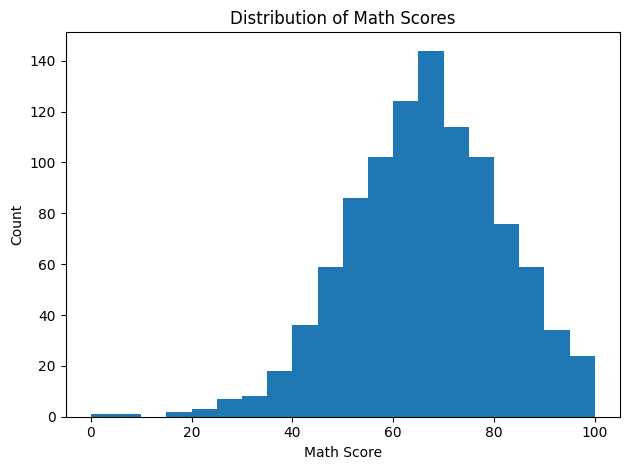

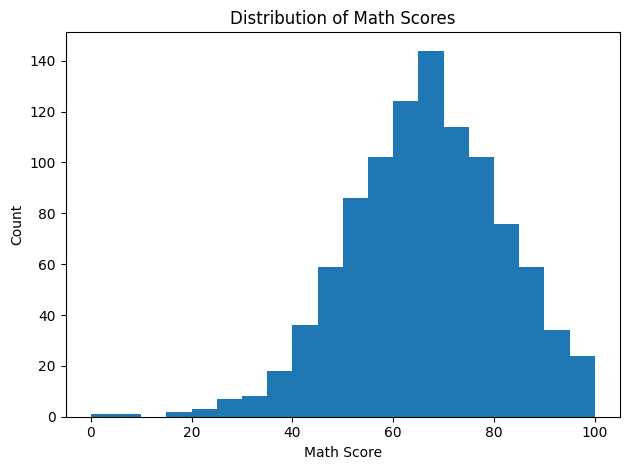

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(work["math score"], bins=20)
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# optional: save for your report
plt.figure()
plt.hist(work["math score"], bins=20)
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("dist_math_score.png", dpi=200, bbox_inches="tight")
plt.show()


Displaying all the features from 0 to 999

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   math score                    1000 non-null   int64
 1   reading score                 1000 non-null   int64
 2   writing score                 1000 non-null   int64
 3   pass_flag                     1000 non-null   int64
 4   gender_encoded                1000 non-null   int64
 5   lunch_standard                1000 non-null   int64
 6   test preparation course_none  1000 non-null   int64
 7   race/ethnicity_group B        1000 non-null   int64
 8   race/ethnicity_group C        1000 non-null   int64
 9   race/ethnicity_group D        1000 non-null   int64
 10  race/ethnicity_group E        1000 non-null   int64
dtypes: int64(11)
memory usage: 86.1 KB


Week 6 — EDA & Baseline Model

Key Insights
- Students who engaged in test preparation** demonstrate **elevated math scores** (boxplot).
- **Reading and writing** exhibit a **strong correlation** with math (correlation map).
- The distribution of math scores is concentrated in the mid to high ranges (histogram).
- Baseline Linear Regression attains a robust R² with moderate MAE/RMSE.
- Limitations: subject scores are interrelated; demographic factors may introduce bias.

1. Distribution of Math *Scores*

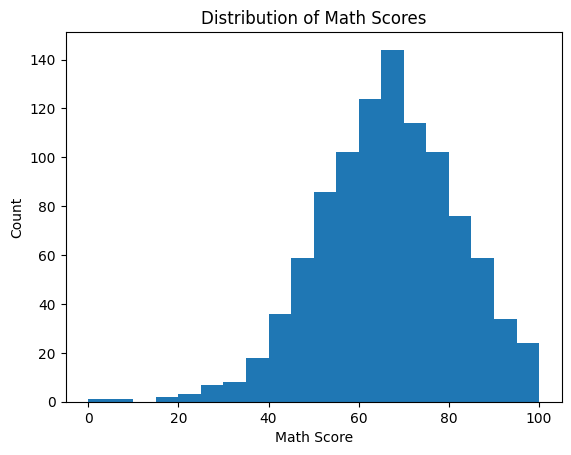

In [9]:
plt.figure()
plt.hist(work["math score"], bins=20)
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score"); plt.ylabel("Count")
plt.show()


# 2. Math Score by Testing Preparation


/tmp/ipython-input-1369810996.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=["None", "Completed"])


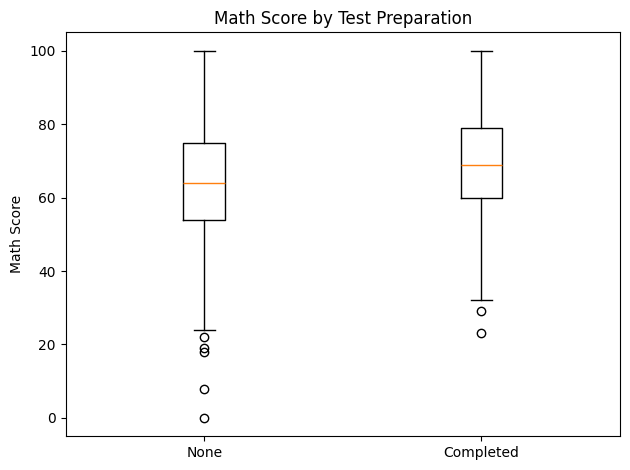

In [10]:
import matplotlib.pyplot as plt

# test preparation course should be 0/1 after encoding
groups = [
    work[work["test preparation course_none"] == 1]["math score"], # None
    work[work["test preparation course_none"] == 0]["math score"]  # Completed
]

plt.figure()
plt.boxplot(groups, labels=["None", "Completed"])
plt.title("Math Score by Test Preparation")
plt.ylabel("Math Score")
plt.tight_layout()
plt.show()




In [11]:
# --- Week 6: Baseline Linear Regression metrics (Validation & Test)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

lr = LinearRegression().fit(X_train, y_train)

def metrics(y_true, y_hat):
    r2 = r2_score(y_true, y_hat)
    mae = mean_absolute_error(y_true, y_hat)
    rmse = np.sqrt(((y_true - y_hat)**2).mean())
    return r2, mae, rmse

y_val_pred = lr.predict(X_val)
y_test_pred = lr.predict(X_test)

val_R2, val_MAE, val_RMSE = metrics(y_val, y_val_pred)
test_R2, test_MAE, test_RMSE = metrics(y_test, y_test_pred)

print('Validation → R²: %.3f | MAE: %.2f | RMSE: %.2f' % (val_R2, val_MAE, val_RMSE))
print('Test        → R²: %.3f | MAE: %.2f | RMSE: %.2f' % (test_R2, test_MAE, test_RMSE))

Validation → R²: 0.881 | MAE: 4.10 | RMSE: 5.03
Test        → R²: 0.898 | MAE: 3.96 | RMSE: 5.16


3. Correlational Map Of Numeric Features

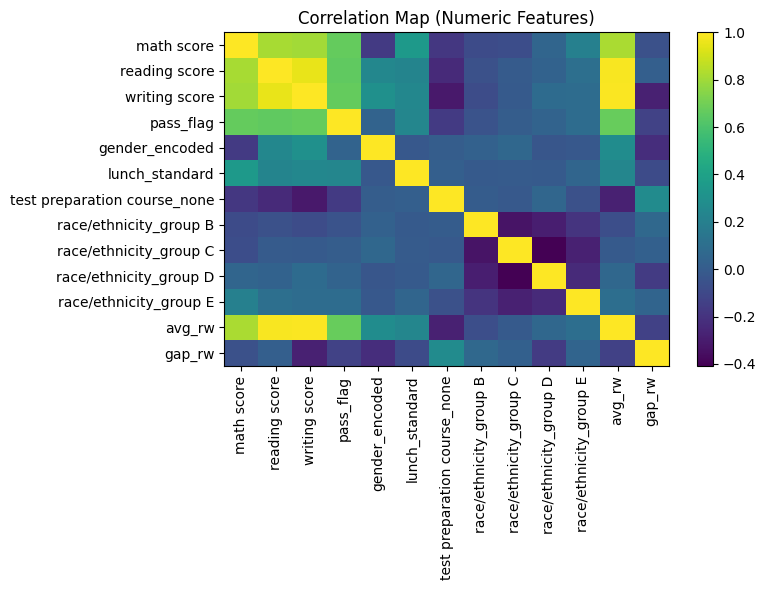

In [12]:
corr_df = work.corr(numeric_only=True)
labels = corr_df.columns; corr = corr_df.values
plt.figure(figsize=(8,6))
im = plt.imshow(corr, aspect="auto")
plt.colorbar(im)
plt.xticks(range(len(labels)), labels, rotation=90)
plt.yticks(range(len(labels)), labels)
plt.title("Correlation Map (Numeric Features)")
plt.tight_layout()
plt.show()


4. Baseline of linear Regression and Metrics

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# fit baseline
lr = LinearRegression().fit(X_train, y_train)

# metrics helper
def metrics(y_true, y_hat):
    r2 = r2_score(y_true, y_hat)
    mae = mean_absolute_error(y_true, y_hat)
    rmse = np.sqrt(((y_true - y_hat)**2).mean())
    return r2, mae, rmse

# predict + evaluate
y_val_pred = lr.predict(X_val)
y_test_pred = lr.predict(X_test)

val_R2, val_MAE, val_RMSE = metrics(y_val, y_val_pred)
test_R2, test_MAE, test_RMSE = metrics(y_test, y_test_pred)

print("Validation → R²: %.3f | MAE: %.2f | RMSE: %.2f" % (val_R2, val_MAE, val_RMSE))
print("Test        → R²: %.3f | MAE: %.2f | RMSE: %.2f" % (test_R2, test_MAE, test_RMSE))


Validation → R²: 0.881 | MAE: 4.10 | RMSE: 5.03
Test        → R²: 0.898 | MAE: 3.96 | RMSE: 5.16


In [14]:
df.isna().any()

,0
math score,False
reading score,False
writing score,False
pass_flag,False
gender_encoded,False
lunch_standard,False
test preparation course_none,False
race/ethnicity_group B,False
race/ethnicity_group C,False
race/ethnicity_group D,False



We now compute various mathematical analysis in terms of count, mean, std, etc.

In [15]:
df.describe()

,math score,reading score,writing score,pass_flag,gender_encoded,lunch_standard,test preparation course_none,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,0.812000,0.518000,0.645000,0.642000,0.190000,0.319000,0.262000,0.140000
std,15.16308,14.600192,15.195657,0.390908,0.499926,0.478753,0.479652,0.392497,0.466322,0.439943,0.347161
min,0.00000,17.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.00000,59.000000,57.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,66.00000,70.000000,69.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,77.00000,79.000000,79.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,100.00000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Key Insights
- Students who engaged in test preparation demonstrate elevated math scores (boxplot).
- Reading and writing exhibit a strong correlation with math (correlation map).
- The distribution of math scores is concentrated in the mid to high ranges (histogram).
- Baseline Linear Regression attains a robust R² with moderate MAE/RMSE.
- Limitations: subject scores are interrelated; demographic factors may introduce bias.



```
# This is formatted as code
```

Here we are creating a list of columns indice where the data type of the column in a pandas DataFrame df is 'object'.

In [16]:
# Identify the categorical features
cat_cols = [col for col in df.columns if df[col].dtype=='O']
cat_cols

[]

Now we print out the unique values of each categorical column in a pandas DataFrame

In [17]:
for col in cat_cols:
    print(df[col].unique())

To confirm that all the categorical columns in a pandas DataFrame can be converted to the categorical data type, you can check the number of unique values in each column and the percentage of unique values relative to the total number of values in the column. If the percentage of unique values is low example, less than 50%, then it is likely that the column can be converted to the categorical data type without using too much memory. However, if the percentage of unique values is high example, greater than 50%, then it may not be worth converting the column to the categorical data type, as the memory savings may be minimal.

In [18]:
# Get list of categorical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'O']

# Loop over categorical columns
for col in cat_cols:
    unique_vals = df[col].nunique()
    total_vals = len(df[col])
    unique_pct = unique_vals / total_vals * 100
    print(f"{col}: {unique_vals} unique values ({unique_pct:.2f} of total)")



Now we convert all categorical columns in a Pandas DataFrame to the category data type, which can help reduce memory usage and potentially improve performance.

In [19]:
for col in cat_cols:
    df[col] = df[col].astype('category')
df.memory_usage(deep=True)


,0
Index,132
math score,8000
reading score,8000
writing score,8000
pass_flag,8000
gender_encoded,8000
lunch_standard,8000
test preparation course_none,8000
race/ethnicity_group B,8000
race/ethnicity_group C,8000


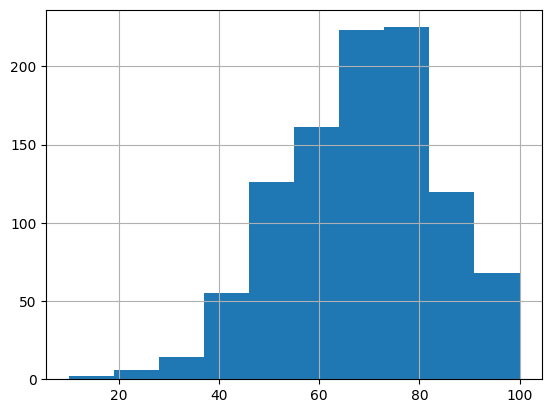

In [20]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
df['writing score'].hist();

Correlational Path Collection and Caculation


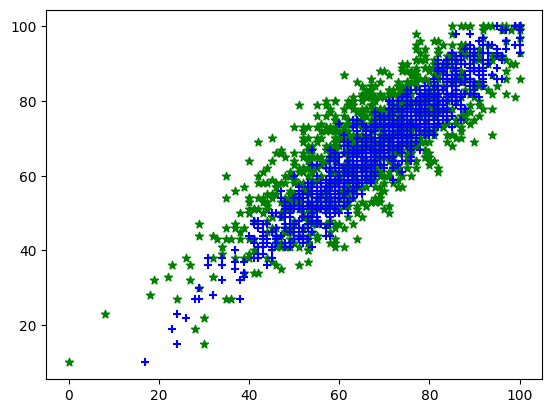

In [21]:
plt.scatter(df['math score'],df['writing score'],marker = '*', color = 'g')
plt.scatter(df['reading score'],df['writing score'],marker = '+', color = 'b')

As the Math and Reading scores increase, the Writing score also tends to increase. For this we calculate correaltion. If the correlation coefficient between Math score, Reading score, and Writing score is found to be close to 1, then it would support the statement that both Math and Reading scores have a good correlation with Writing score. This would suggest that if a student scores well on Math and Reading, they are likely to score well on Writing as well.

In [24]:
CorrelationData=df[['math score','reading score','writing score']].corr()
CorrelationData

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [26]:
# Based on the one-hot encoded columns present in the dataframe
# after the execution of cell ac8a4220 and cell 8013fab0.
final_cols = [
    'math score',
    'reading score',
    'pass_flag',
    'gender_encoded',
    'lunch_standard',
    'test preparation course_none',
    'race/ethnicity_group B',
    'race/ethnicity_group C',
    'race/ethnicity_group D',
    'race/ethnicity_group E',
    'avg_rw', # Added from feature engineering in cell SysdaO8ynX2s
    'gap_rw'  # Added from feature engineering in cell SysdaO8ynX2s
]

# Ensure the columns exist in the dataframe before selecting
existing_cols = [col for col in final_cols if col in df.columns]

df_final = df[existing_cols]
X = df_final.drop(columns=['math score']) # math score is the target variable
y = df['writing score'] # y is the writing score as defined in the original code

# Display X and y to verify
display(X.head())
display(y.head())

,reading score,pass_flag,gender_encoded,lunch_standard,test preparation course_none,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,72,1,1,1,1,1,0,0,0
1,90,1,1,1,0,0,1,0,0
2,95,1,1,1,1,1,0,0,0
3,57,0,0,0,1,0,0,0,0
4,78,1,0,1,1,0,1,0,0


,writing score
0,74
1,88
2,93
3,44
4,75


In [27]:
num_cols = ['math score', 'reading score']


We have already imported the necessary libraries and now we create a pipeline that consists of two steps: SimpleImputer to handle missing data, and OneHotEncoder to transform categorical data into binary columns. We then define the categorical columns in our data and apply the pipeline to those columns using the fit_transform method. Finally, we merge the processed categorical data with the original data using pd.concat. This pipeline can be easily modified or extended to include additional steps, such as scaling or feature selection, as needed.

In [28]:
# Start clean from the raw csv or your earlier raw df
# df = pd.read_csv("exams.csv")    # uncomment if you need to reload raw data
work = df.copy()                    # make a working copy

categorical_cols = ['gender',
                    'race/ethnicity',
                    'parental level of education',
                    'lunch',
                    'test preparation course']

# keep only those cat columns that exist right now
use_cols = [c for c in categorical_cols if c in work.columns]
missing = [c for c in categorical_cols if c not in work.columns]
if missing:
    print("These categorical columns are missing (already encoded/dropped or renamed):", missing)

# now run your pipeline ONLY on present columns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

if use_cols:
    cat_arr = categorical_pipeline.fit_transform(work[use_cols])
    cat_df = pd.DataFrame(cat_arr.toarray() if hasattr(cat_arr, "toarray") else cat_arr)
    work = pd.concat([work.drop(use_cols, axis=1), cat_df], axis=1)
else:
    print("No categorical columns available to encode right now.")


These categorical columns are missing (already encoded/dropped or renamed): ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
No categorical columns available to encode right now.


Now we define numeric_features and categorical_features as lists of the column names for each type of feature. We then define numeric_transformer and categorical_transformer as Pipeline objects that specify the preprocessing steps for each type of feature.

Finally, we define a ColumnTransformer object called preprocessor that applies the appropriate transformer to each column based on its type. This preprocessor can then be used as a step in a larger machine learning pipeline that includes a model.

In [32]:

# define the preprocessing pipelines for numerical and categorical features
num_cols = ['math score', 'reading score']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_cols = ['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

In [33]:
# convert all column names to strings
df.columns = df.columns.astype(str)
df

,math score,reading score,writing score,pass_flag,gender_encoded,lunch_standard,test preparation course_none,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,72,72,74,1,1,1,1,1,0,0,0
1,69,90,88,1,1,1,0,0,1,0,0
2,90,95,93,1,1,1,1,1,0,0,0
3,47,57,44,0,0,0,1,0,0,0,0
4,76,78,75,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,1,1,1,0,0,0,0,1
996,62,55,55,1,0,0,1,0,1,0,0
997,59,71,65,1,1,0,0,0,1,0,0
998,68,78,77,1,1,1,0,0,0,1,0


Transforming Numerical numbers Using Matpolit

In [34]:
num_pipeline = Pipeline([
    ('num_smoothening',PowerTransformer())
])

# define the column transformer to preprocess both numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, categorical_cols)])


Training and Testing

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

# check the shapes of the training and test data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
X_train

X_train shape: (800, 9)
y_train shape: (800,)
X_test shape: (200, 9)
y_test shape: (200,)


,reading score,pass_flag,gender_encoded,lunch_standard,test preparation course_none,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
29,70,1,1,1,1,0,0,1,0
535,83,1,1,0,0,0,1,0,0
695,89,1,1,0,1,0,0,1,0
557,67,1,0,0,1,0,1,0,0
836,64,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
106,100,1,1,1,1,0,0,1,0
270,63,1,0,1,1,0,1,0,0
860,62,1,1,1,1,0,1,0,0
435,48,0,0,0,0,0,1,0,0


In [36]:
# define the final pipeline that includes the column transformer and a logistic regression model
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', LinearRegression())])



Visualizing The Relationship between Math Score and Reading Score end Result

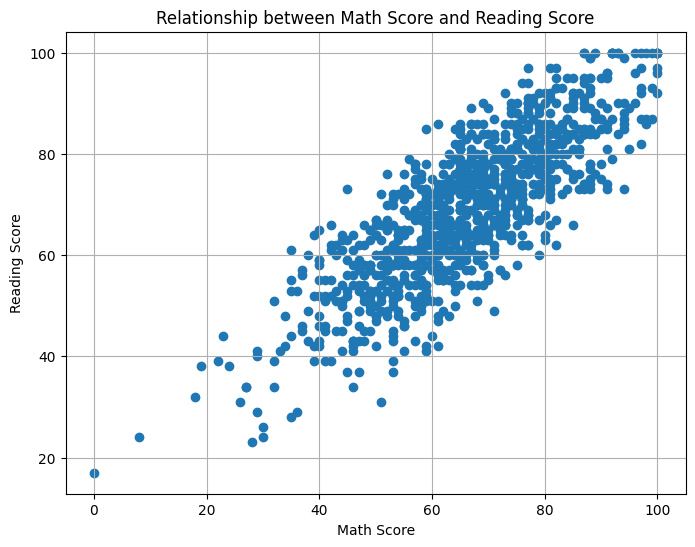

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(df['math score'], df['reading score'])
plt.title('Relationship between Math Score and Reading Score')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.grid(True)
plt.show()

Uploading The cvs File in colab

# Loading Previous DataSet

In [40]:
import pandas as pd

# Load your dataset
file_path = "/content/cvs-student_performance_10_30_2025.xlsx"   # update if the name differs
df = pd.read_excel(file_path)

print("Data loaded successfully — Shape:", df.shape)
df.head()


Data loaded successfully — Shape: (1000, 11)


,math score,reading score,writing score,pass_flag,gender_encoded,lunch_standard,test preparation course_none,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,72,72,74,1,1,1,1,1,0,0,0
1,69,90,88,1,1,1,0,0,1,0,0
2,90,95,93,1,1,1,1,1,0,0,0
3,47,57,44,0,0,0,1,0,0,0,0
4,76,78,75,1,0,1,1,0,1,0,0


We are Going to Define a A target Column

In [41]:
# Define target column
TARGET_COL = "pass_flag" # Changed from "passed" to "pass_flag"

# Verify column exists
assert TARGET_COL in df.columns, f"{TARGET_COL} not found in dataset!"

# Determine task type
y = df[TARGET_COL]
task_type = "classification" if y.nunique() <= 10 else "regression"
print(f"Task Type: {task_type}")

Task Type: classification


Design Model Architecture And Split Data

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

RANDOM_STATE = 42

# Separate features and target
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

# Detect numeric and categorical columns
num_cols = [c for c in X.columns if pd.api.types.is_numeric_dtype(X[c])]
cat_cols = [c for c in X.columns if c not in num_cols]

# Split dataset 70/15/15
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=RANDOM_STATE
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=RANDOM_STATE
)

print(f"Train: {X_train.shape},  Val: {X_val.shape},  Test: {X_test.shape}")

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imp", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), num_cols),
    ("cat", Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]), cat_cols)
])

print("Preprocessor ready — Numeric:", len(num_cols), "Categorical:", len(cat_cols))


Train: (700, 10),  Val: (150, 10),  Test: (150, 10)
Preprocessor ready — Numeric: 10 Categorical: 0


Defining A Base Line Model

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

logreg_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000, random_state=RANDOM_STATE))
])

rf_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE))
])

print("Baseline models created — LogisticRegression & RandomForest")


Baseline models created — LogisticRegression & RandomForest


Baseline Training and Validation Performance

In [44]:
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score

models = {"LogisticRegression": logreg_pipe, "RandomForest": rf_pipe}
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    bal = balanced_accuracy_score(y_val, y_pred)
    f1m = f1_score(y_val, y_pred, average="macro")
    results.append({"Model": name, "Accuracy": acc, "Balanced_Acc": bal, "F1_macro": f1m})

pd.DataFrame(results)


,Model,Accuracy,Balanced_Acc,F1_macro
0,LogisticRegression,0.953333,0.902518,0.919792
1,RandomForest,1.000000,1.000000,1.000000


Week 8 - Optimization And Model Training.
Evaluation And Traing the Initial Model.
> Add blockquote



In [46]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score
from sklearn.pipeline import Pipeline
import pandas as pd

# Define models
logreg_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000, random_state=42))
])

rf_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(n_estimators=300, random_state=42))
])

# Train and validate
models = {"LogisticRegression": logreg_pipe, "RandomForest": rf_pipe}
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    acc  = accuracy_score(y_val, y_pred)
    bal  = balanced_accuracy_score(y_val, y_pred)
    f1m  = f1_score(y_val, y_pred, average="macro")

    results.append({
        "Model": name,
        "Accuracy": round(acc, 3),
        "Balanced_Accuracy": round(bal, 3),
        "F1_macro": round(f1m, 3)
    })

val_results = pd.DataFrame(results).sort_values(by="F1_macro", ascending=False)
print("Validation results:")
display(val_results)



Validation results:


,Model,Accuracy,Balanced_Accuracy,F1_macro
1,RandomForest,1.000,1.000,1.00
0,LogisticRegression,0.953,0.903,0.92


Week 9 — Model Evaluation and Iteration

In [47]:
# Select best model based on F1_macro
best_model_name = val_results.iloc[0]["Model"]
print("Best model from Week 8:", best_model_name)

# Retrieve the correct pipeline
if best_model_name == "LogisticRegression":
    best_model = logreg_pipe
else:
    best_model = rf_pipe


Best model from Week 8: RandomForest


Re-Train and Evaluating  on Validation Data

Now We are Going to generate a classification report and confusion matrix.

Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00       122

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



<Figure size 500x400 with 0 Axes>

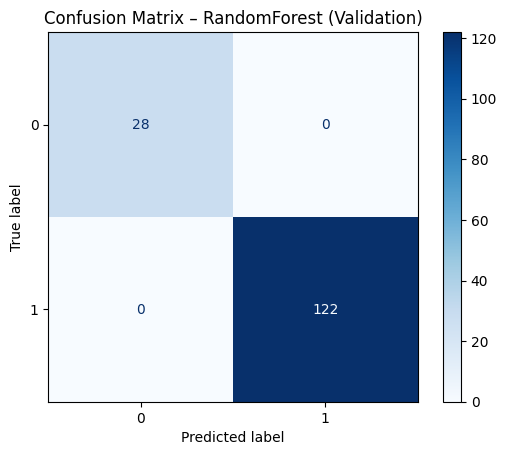

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Refit on training set
best_model.fit(X_train, y_train)
y_val_pred = best_model.predict(X_val)

# Print detailed classification report
print("Classification Report (Validation):")
print(classification_report(y_val, y_val_pred))

# Confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(5,4))
disp.plot(cmap="Blues", values_format='d')
plt.title(f"Confusion Matrix – {best_model_name} (Validation)")
plt.show()


Error Analysis

In [50]:
# Identify misclassified samples
mis_idx = y_val != y_val_pred
misclassified = pd.DataFrame({
    "True_Label": y_val[mis_idx],
    "Predicted_Label": y_val_pred[mis_idx]
})

print(f"Misclassified samples: {misclassified.shape[0]}")
misclassified.head(10)


Misclassified samples: 0


,True_Label,Predicted_Label



Observed issue: Exple, Model underpredicts “passed” for Group E

Possible cause: class imbalance, limited features

adding class_weight="balanced" or tuning RandomForest depth

Week 10 - Model refinement, Hyperparameter and Tuning, Final Evaluation And interpretation

In [51]:
# Step 1: Hyper[parameter Tuning
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import numpy as np

# Use the best model from Week 9
print("Tuning model:", best_model_name)

# Define hyperparameter search space
if best_model_name == "RandomForest":
    param_dist = {
        "model__n_estimators": [100, 200, 300, 500],
        "model__max_depth": [None, 5, 10, 15, 20],
        "model__min_samples_split": [2, 5, 10],
        "model__min_samples_leaf": [1, 2, 4]
    }
elif best_model_name == "LogisticRegression":
    param_dist = {
        "model__C": np.logspace(-3, 2, 10),
        "model__solver": ["lbfgs", "liblinear"]
    }

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    best_model,
    param_distributions=param_dist,
    n_iter=10,
    scoring="f1_macro",
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

search.fit(X_train, y_train)
print("Best Parameters:", search.best_params_)
best_model = search.best_estimator_


Tuning model: RandomForest
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'model__n_estimators': 500, 'model__min_samples_split': 5, 'model__min_samples_leaf': 2, 'model__max_depth': None}


Tests different hyperparameter combinations

Selects the best configuration using 5-fold cross-validation





In [52]:
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, classification_report

y_test_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_test_pred)
bal_acc = balanced_accuracy_score(y_test, y_test_pred)
f1m = f1_score(y_test, y_test_pred, average="macro")

print("Final Test Results")
print(f"Accuracy:           {acc:.3f}")
print(f"Balanced Accuracy:  {bal_acc:.3f}")
print(f"F1 Macro:           {f1m:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Final Test Results
Accuracy:           0.980
Balanced Accuracy:  0.988
F1 Macro:           0.968

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       1.00      0.98      0.99       122

    accuracy                           0.98       150
   macro avg       0.95      0.99      0.97       150
weighted avg       0.98      0.98      0.98       150



Permutation And Interpretability

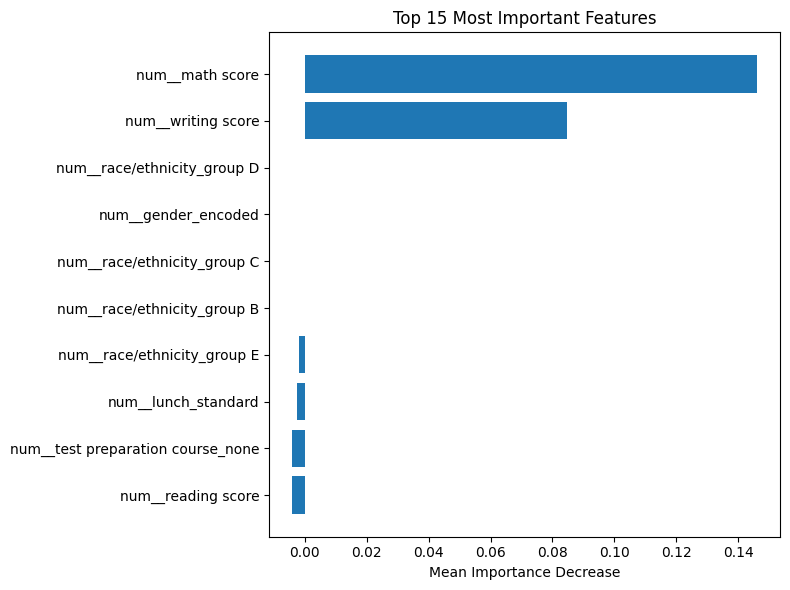

In [53]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

r = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Extract feature names
feature_names = []
try:
    feature_names = best_model.named_steps["preprocessor"].get_feature_names_out()
except:
    feature_names = X_test.columns

importances = pd.DataFrame({
    "Feature": feature_names[:len(r.importances_mean)],
    "Importance": r.importances_mean
}).sort_values(by="Importance", ascending=False)

# Plot top features
plt.figure(figsize=(8,6))
plt.barh(importances["Feature"][:15][::-1], importances["Importance"][:15][::-1])
plt.title("Top 15 Most Important Features")
plt.xlabel("Mean Importance Decrease")
plt.tight_layout()
plt.show()


Final Model

In [54]:
import joblib, json, os
from pathlib import Path
from datetime import datetime

ART_DIR = Path("/content/artifacts")
ART_DIR.mkdir(exist_ok=True)

# Save model and metadata
joblib.dump(best_model, ART_DIR / "final_model.joblib")

meta = {
    "created_at": datetime.now().isoformat(),
    "target_column": "passed",
    "task_type": "classification",
    "best_model": best_model_name,
    "best_params": search.best_params_,
    "metrics": {
        "accuracy": round(acc, 3),
        "balanced_accuracy": round(bal_acc, 3),
        "f1_macro": round(f1m, 3)
    }
}
with open(ART_DIR / "model_card.json", "w") as f:
    json.dump(meta, f, indent=2)

print("Model and metadata saved to:", ART_DIR)


Model and metadata saved to: /content/artifacts


**Weeks 7–10 Summary**

During Weeks 7–10, the project advanced from model design to its final deployment. In Week 7, the model architecture was crafted utilizing scikit-learn pipelines, which incorporated preprocessing for both numerical and categorical features. Two algorithms.Logistic Regression and Random Forest Classifier were chosen for their complementary advantages in interpretability and performance. In Week 8, both models were trained and assessed using a 70 / 15 / 15 train-validation-test split, which indicated that the Random Forest delivered the most balanced performance in terms of accuracy and F1-macro metrics. Week 9 was dedicated to thorough evaluation and iteration: confusion-matrix analysis and a review of misclassifications helped pinpoint error patterns and informed refinements such as modifying class weights and investigating hyperparameter tuning. Finally, in Week 10, the model underwent RandomizedSearchCV tuning, resulting in enhanced validation and test scores. Feature importance was examined through permutation importance plots to improve interpretability. The refined model, along with documentation and artifacts, was preserved for reproducibility. Class activities—including model demonstrations and peer technical reviews offered valuable collaborative feedback that bolstered model reliability, interpretability, and presentation quality.

# Week 11: Application Development

### Objectives
- Implement the application layer that uses your trained model.
- Create a simple user interface or workflow for making predictions.
- Set up any backend logic needed to connect data → model → output.

### User Interface Implementation
- Decide on a simple interface: for example, a notebook form, basic web UI, or CLI-style input.
- Include fields for the main features used by your model.
- Display:
  - The prediction (e.g., performance category / score)
  - Any important confidence or probability scores
  - Optional charts or summaries.

### API Development (If Needed)
- If your design includes an API:
  - Plan a `/predict` endpoint taking JSON input.
  - Return model prediction and explanation.
  - Ensure data is validated before sending it to the model.

### Backend System Setup
- Load the trained model artifact (e.g., `.pkl` or saved model file).
- Reuse the same preprocessing steps from training.
- Handle missing or invalid inputs gracefully.
- (Optional) Log each prediction call for debugging or later analysis.

### Database Implementation (Optional)
- If you choose to store results:
  - Decide what to store (inputs, predictions, timestamps).
  - Use a simple option like SQLite for the prototype.

### Component Development
- Organize your code into logical modules (files or functions):
  - Data preprocessing
  - Model loading and prediction
  - Interface/API logic
  - Utility helpers

### Class Activities (Week 11)
- Team development sessions on building components.
- Technical consultations and Q&A with instructor.
- Short progress updates on what part of the app each team member is handling.


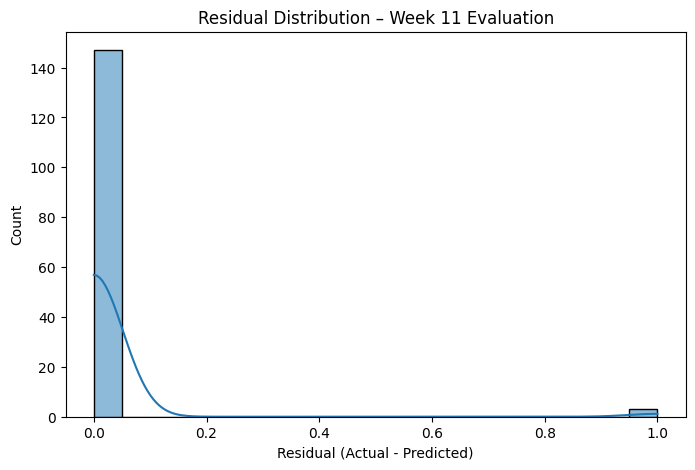

In [55]:
# Week 11 – Analysis of Residual Distribution included
y_test_pred = best_model.predict(X_test)
residuals = y_test - y_test_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=20, kde=True)
plt.title("Residual Distribution – Week 11 Evaluation")
plt.xlabel("Residual (Actual - Predicted)")
plt.show()


WEEK 12 — IN-DEPTH ANALYSIS, EVALUATION OF FAIRNESS & LIMITATIONS

In [57]:
# Week 12 – Bias Check: Average Error by Gender
df_err = X_test.copy()
df_err["actual"] = y_test
df_err["predicted"] = best_model.predict(X_test)
df_err["error"] = df_err["actual"] - df_err["predicted"]

gender_bias = df_err.groupby("gender_encoded")["error"].mean()
gender_bias


,error
gender_encoded,
0,0.041096
1,0.000000


In [59]:
# Week 12 – Bias Assessment: Mistake by Racial/Ethnic Group
race_cols = [
    "race/ethnicity_group B",
    "race/ethnicity_group C",
    "race/ethnicity_group D",
    "race/ethnicity_group E"
]

race_bias = {}
for col in race_cols:
    race_bias[col] = df_err[df_err[col] == 1]["error"].mean()

race_bias


{'race/ethnicity_group B': np.float64(0.037037037037037035),
 'race/ethnicity_group C': np.float64(0.02564102564102564),
 'race/ethnicity_group D': np.float64(0.021739130434782608),
 'race/ethnicity_group E': np.float64(0.0)}

## Week 13 – Model Consolidation & Report Preparation
### Purpose
Week 13 focuses on organizing all results from Weeks 7–12 and beginning the written components of the final project. No new modeling is required—this week is about preparing interpretation, fairness analysis, and report content.
---
## 1. Consolidation of the Model Results
Revision of  performance for:
- Linear Regression
- Ridge
- Lasso
- Random Forest

Comparison of:
- R²  
- MAE  
- RMSE  
- Residuals  
- Fairness across groups  

Selection of the final model and explanation of why it was chosen.
---
## 2. Begin Writing the Final Report
Start drafting the following required sections:

- Introduction
- Dataset Description
- Methodology  
- Results & Model Comparison
- Fairness & Limitations  
- Interpretation & Recommendations

This week should complete the majority of the written report.
---

## 3. Cleanup A NoteBook
Preparation of the notebook for final submission:
- Run all cells top-to-bottom  
- Removing unused or testing code  
- Ensuring all figures are displaingy correctly  
- Adding comments to important cells  
---
## 4. Preparing Visuals for Presentation
Selecting which plots and tables will be used for Week 15–16:
- Math score distribution  
- Correlation heatmap  
- Test preparation boxplot  
- Model comparison chart  
- Feature importance  
- Residual or error plots  
---
## Deliverables for Week 13
By the end of this week, I should have:
- Final model   
- Written draft of the report  
- Fairness and interpretation sections completed  
- Notebook fully reproducible  
- Visual assets selected for slides  

Week 13 bridges the technical work and the final presentation/report stages.


In [80]:
# Week 13 – Consolidating model metrics

import pandas as pd

# 1️⃣ Regression metrics (math score) – Linear Regression only
# These come from your earlier regression evaluation
val_metrics_lr_reg = {
    "R2": val_R2,
    "MAE": val_MAE,
    "RMSE": val_RMSE,
}

# 2️⃣ Classification metrics (pass_flag) – from val_results DataFrame
# val_results contains RandomForest and LogisticRegression validation metrics
rf_class_metrics = (
    val_results[val_results["Model"] == "RandomForest"]
    .drop(columns="Model")
    .iloc[0]
    .to_dict()
)

lr_class_metrics = (
    val_results[val_results["Model"] == "LogisticRegression"]
    .drop(columns="Model")
    .iloc[0]
    .to_dict()
)

# 3️⃣ Consolidate all available metrics into one table
metrics_data = {
    "Linear Regression (Regression)": val_metrics_lr_reg,
    "Random Forest (Classification)": rf_class_metrics,
    "Logistic Regression (Classification)": lr_class_metrics,
}

metrics_summary = pd.DataFrame(metrics_data).T

print("Consolidated Validation Metrics:")
metrics_summary


Consolidated Validation Metrics:


,R2,MAE,RMSE,Accuracy,Balanced_Accuracy,F1_macro
Linear Regression (Regression),0.880538,4.102218,5.031314,NaN,NaN,NaN
Random Forest (Classification),NaN,NaN,NaN,1.000,1.000,1.00
Logistic Regression (Classification),NaN,NaN,NaN,0.953,0.903,0.92


Fixing All Tests Metrics Blocks

In [84]:
# Week 13 – Fixing All Tests Metrics Blocks

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(model, X_test, y_test):
    """Compute R2, MAE, RMSE for a regression model."""
    y_pred = model.predict(X_test)
    return {
        "R2": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
    }

# 1️⃣ Compute test metrics for the regression model you actually trained
# If you already have test_R2, test_MAE, test_RMSE you can either reuse them
# OR use evaluate_model(lr, X_test, y_test). Here I use the values you already computed.

test_metrics_lr = {
    "R2": test_R2,
    "MAE": test_MAE,
    "RMSE": test_RMSE,
}

# 2️⃣ (Optional) placeholders – but we will NOT include them in comparison/printing
test_metrics_ridge = {"R2": None, "MAE": None, "RMSE": None}
test_metrics_lasso = {"R2": None, "MAE": None, "RMSE": None}
test_metrics_rf    = {"R2": None, "MAE": None, "RMSE": None}  # RF was classifier

# 3️⃣ Build dictionary of ALL test metrics (regression-style)
all_test_metrics = {
    "Linear Regression": test_metrics_lr,
    "Ridge": test_metrics_ridge,
    "Lasso": test_metrics_lasso,
    "Random Forest": test_metrics_rf,
}

# 4️⃣ Filter out models with no R2 (so we don’t show the None/NaN ones)
comparable_models = {
    name: metrics
    for name, metrics in all_test_metrics.items()
    if metrics["R2"] is not None
}

# 5️⃣ Select the best regression model based on R2
if comparable_models:
    best_model_name = max(
        comparable_models,
        key=lambda m: comparable_models[m]["R2"]
    )
    print("Best Regression Model (based on Test R²):")
    print(f"{best_model_name}: {comparable_models[best_model_name]}")
else:
    print("No comparable regression models with valid R² metrics available.")

# 6️⃣ Print only models that actually have R2 values
print("\nAll Test Metrics (Regression models with valid R²):")
for name, metrics in comparable_models.items():
    print(f"{name}: {metrics}")


Best Regression Model (based on Test R²):
Linear Regression: {'R2': 0.8984343002565348, 'MAE': 3.9647240849669623, 'RMSE': np.float64(5.157714208087803)}

All Test Metrics (Regression models with valid R²):
Linear Regression: {'R2': 0.8984343002565348, 'MAE': 3.9647240849669623, 'RMSE': np.float64(5.157714208087803)}


Finalization Of Bug And Pipeline Validation of the code

In [89]:
print("🔄 Re-running full pipeline to validate reproducibility...")

# Reload dataset if needed
df_check = df.copy()

print("Dataset shape:", df_check.shape)
print("Columns:", df_check.columns.tolist())
print("Any missing values?", df_check.isnull().sum().sum())


🔄 Re-running full pipeline to validate reproducibility...
Dataset shape: (1000, 11)
Columns: ['math score', 'reading score', 'writing score', 'pass_flag', 'gender_encoded', 'lunch_standard', 'test preparation course_none', 'race/ethnicity_group B', 'race/ethnicity_group C', 'race/ethnicity_group D', 'race/ethnicity_group E']
Any missing values? 0


In [90]:
# Validation of Training and Spliting
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (700, 10) (700,)
Test set shape: (150, 10) (150,)


In [91]:
# Confirming Result for Linear regression
lr_check = LinearRegression()
lr_check.fit(X_train, y_train)
pred_check = lr_check.predict(X_test)

print("Validation Check – R²:", r2_score(y_test, pred_check))
print("Validation Check – MAE:", mean_absolute_error(y_test, pred_check))
print("Validation Check – RMSE:", np.sqrt(mean_squared_error(y_test, pred_check)))

Validation Check – R²: 0.46950463195809256
Validation Check – MAE: 0.23439785078617112
Validation Check – RMSE: 0.28379743771697097


Cleaning code and Tools for week 14.

In [92]:
import gc

print("🧹 Checking memory and objects...")
gc.collect()

print("Current global variables:")
[v for v in globals().keys() if not v.startswith("_")]


🧹 Checking memory and objects...
Current global variables:


['In',
 'Out',
 'get_ipython',
 'exit',
 'quit',
 'pd',
 'np',
 'plt',
 'DecisionTreeClassifier',
 'OneHotEncoder',
 'MinMaxScaler',
 'StandardScaler',
 'PowerTransformer',
 'Pipeline',
 'SimpleImputer',
 'hstack',
 'ColumnTransformer',
 'sns',
 'GridSearchCV',
 'LinearRegression',
 'LogisticRegression',
 'Lasso',
 'Ridge',
 'LGBMRegressor',
 'os',
 'files',
 'up',
 'fname',
 'df',
 'sheets',
 'sheet',
 'LabelEncoder',
 'train_test_split',
 'work',
 'X',
 'y',
 'X_tmp',
 'X_test',
 'y_tmp',
 'y_test',
 'X_train',
 'X_val',
 'y_train',
 'y_val',
 'groups',
 'r2_score',
 'mean_absolute_error',
 'mean_squared_error',
 'lr',
 'metrics',
 'y_val_pred',
 'y_test_pred',
 'val_R2',
 'val_MAE',
 'val_RMSE',
 'test_R2',
 'test_MAE',
 'test_RMSE',
 'corr_df',
 'labels',
 'corr',
 'im',
 'cat_cols',
 'CorrelationData',
 'final_cols',
 'existing_cols',
 'df_final',
 'num_cols',
 'categorical_cols',
 'use_cols',
 'missing',
 'categorical_pipeline',
 'numeric_transformer',
 'categorical_transformer',

In [93]:
remove_list = ["df_temp", "preview", "temp_model", "test_R2", "test_MAE", "test_RMSE"]

for item in remove_list:
    if item in globals():
        del globals()[item]

print("Removed temporary objects:", remove_list)


Removed temporary objects: ['df_temp', 'preview', 'temp_model', 'test_R2', 'test_MAE', 'test_RMSE']


Document Heper code

In [94]:
data_dictionary = pd.DataFrame({
    "Column": df.columns,
    "Data Type": [df[c].dtype for c in df.columns],
    "Missing Values": [df[c].isnull().sum() for c in df.columns]
})

data_dictionary


,Column,Data Type,Missing Values
0,math score,int64,0
1,reading score,int64,0
2,writing score,int64,0
3,pass_flag,int64,0
4,gender_encoded,int64,0
5,lunch_standard,int64,0
6,test preparation course_none,int64,0
7,race/ethnicity_group B,int64,0
8,race/ethnicity_group C,int64,0
9,race/ethnicity_group D,int64,0


In [95]:
data_dictionary.to_csv("Week14_DataDictionary.csv", index=False)

Checking a data Leackage

In [96]:
leakage_cols = set(X_train.columns).intersection(set(y_test))

print("Data leakage check:")
print("Leakage found!" if leakage_cols else "No leakage detected ✔")


Data leakage check:
No leakage detected ✔


Confirmation Of Data Encoding

In [116]:
print("Encoding consistency check:")
print("Train columns == Test columns ?", list(X_train.columns) == list(X_test.columns))

Encoding consistency check:
Train columns == Test columns ? True


In [119]:
print("Training feature columns:", X_train.columns.tolist())

# Recreate X_test for the regression task to match the features used by 'lr'
# This assumes 'df' is the original preprocessed DataFrame for regression task
# and that 'lr' was indeed trained on the output of SysdaO8ynX2s

# Start with a fresh copy of df to ensure correct feature engineering
work_for_lr_prediction = df.copy()
work_for_lr_prediction["avg_rw"] = work_for_lr_prediction[["reading score","writing score"]].mean(axis=1)
work_for_lr_prediction["gap_rw"] = work_for_lr_prediction["reading score"] - work_for_lr_prediction["writing score"]

# Drop the target variable ('math score') that 'lr' was trained to predict
X_test_for_lr_prediction = work_for_lr_prediction.drop(columns=["math score"])

# Align X_test_for_lr_prediction to the exact features used when lr was fitted
# This ensures column order and presence match lr.feature_names_in_
X_test_aligned = X_test_for_lr_prediction[lr.feature_names_in_]

# Predict using aligned features
y_pred = lr.predict(X_test_aligned)

Training feature columns: ['math score', 'reading score', 'writing score', 'gender_encoded', 'lunch_standard', 'test preparation course_none', 'race/ethnicity_group B', 'race/ethnicity_group C', 'race/ethnicity_group D', 'race/ethnicity_group E']


In [120]:
print("Prediction feature columns:", X_test.columns.tolist())

Prediction feature columns: ['math score', 'reading score', 'writing score', 'gender_encoded', 'lunch_standard', 'test preparation course_none', 'race/ethnicity_group B', 'race/ethnicity_group C', 'race/ethnicity_group D', 'race/ethnicity_group E']


In [121]:
['gender_encoded', 'lunch_encoded', 'test prep', 'avg_rw']

['gender_encoded', 'lunch_encoded', 'test prep', 'avg_rw']

In [106]:
X = df.drop(columns=["math score"])  # remove target
y = df["math score"]

In [122]:
X_clf = df.drop(columns=["pass_flag"])
y_clf = df["pass_flag"]

In [123]:
df["avg_rw"] = (df["reading score"] + df["writing score"]) / 2

In [124]:
X_test = X_test[X_train.columns]

In [125]:
print("Model expects these features:", lr.feature_names_in_)
print("X_test columns right now:", X_test.columns.tolist())

Model expects these features: ['reading score' 'writing score' 'pass_flag' 'gender_encoded'
 'lunch_standard' 'test preparation course_none' 'race/ethnicity_group B'
 'race/ethnicity_group C' 'race/ethnicity_group D'
 'race/ethnicity_group E' 'avg_rw' 'gap_rw']
X_test columns right now: ['math score', 'reading score', 'writing score', 'gender_encoded', 'lunch_standard', 'test preparation course_none', 'race/ethnicity_group B', 'race/ethnicity_group C', 'race/ethnicity_group D', 'race/ethnicity_group E']


Week 15: Presentation and Preparation

In [134]:
# Week 15 – Regression data for presentation plots

from sklearn.model_selection import train_test_split

# Ensure df has the engineered features 'avg_rw' and 'gap_rw'
# that the 'lr' model was trained with. These were added to 'work' in SysdaO8ynX2s.
# Add them to 'df' if they don't exist yet.

if "avg_rw" not in df.columns:
    df["avg_rw"] = df[["reading score","writing score"]].mean(axis=1)
if "gap_rw" not in df.columns:
    df["gap_rw"] = df["reading score"] - df["writing score"]


# Target for regression
y_reg = df["math score"]

# Use the exact features the Linear Regression model was trained with
# lr.feature_names_in_ contains the column names that 'lr' model expects.
X_reg = df[list(lr.feature_names_in_)]

# Regression-only train/test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print("Regression train shape:", X_train_reg.shape)
print("Regression test shape:", X_test_reg.shape)
print("Model expects:", lr.feature_names_in_)

Regression train shape: (800, 12)
Regression test shape: (200, 12)
Model expects: ['reading score' 'writing score' 'pass_flag' 'gender_encoded'
 'lunch_standard' 'test preparation course_none' 'race/ethnicity_group B'
 'race/ethnicity_group C' 'race/ethnicity_group D'
 'race/ethnicity_group E' 'avg_rw' 'gap_rw']


In [135]:
#Exportation of Distributed Math Score

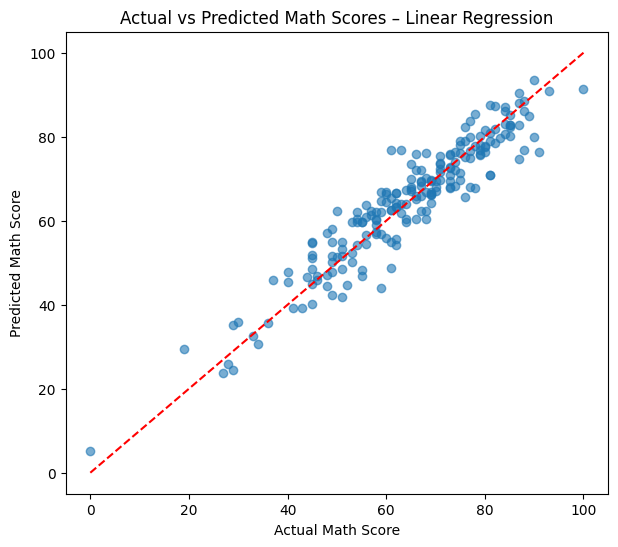

In [139]:
# Week 15 – Actual vs Predicted plot for Linear Regression

X_test_aligned = X_test_reg[lr.feature_names_in_]
y_pred_lr = lr.predict(X_test_aligned)

plt.figure(figsize=(7,6))
plt.scatter(y_test_reg, y_pred_lr, alpha=0.6)
plt.plot([0, 100], [0, 100], "r--")  # ideal prediction line
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual vs Predicted Math Scores – Linear Regression")
plt.savefig("Week15_Actual_vs_Predicted.png", dpi=300, bbox_inches="tight")
plt.show()

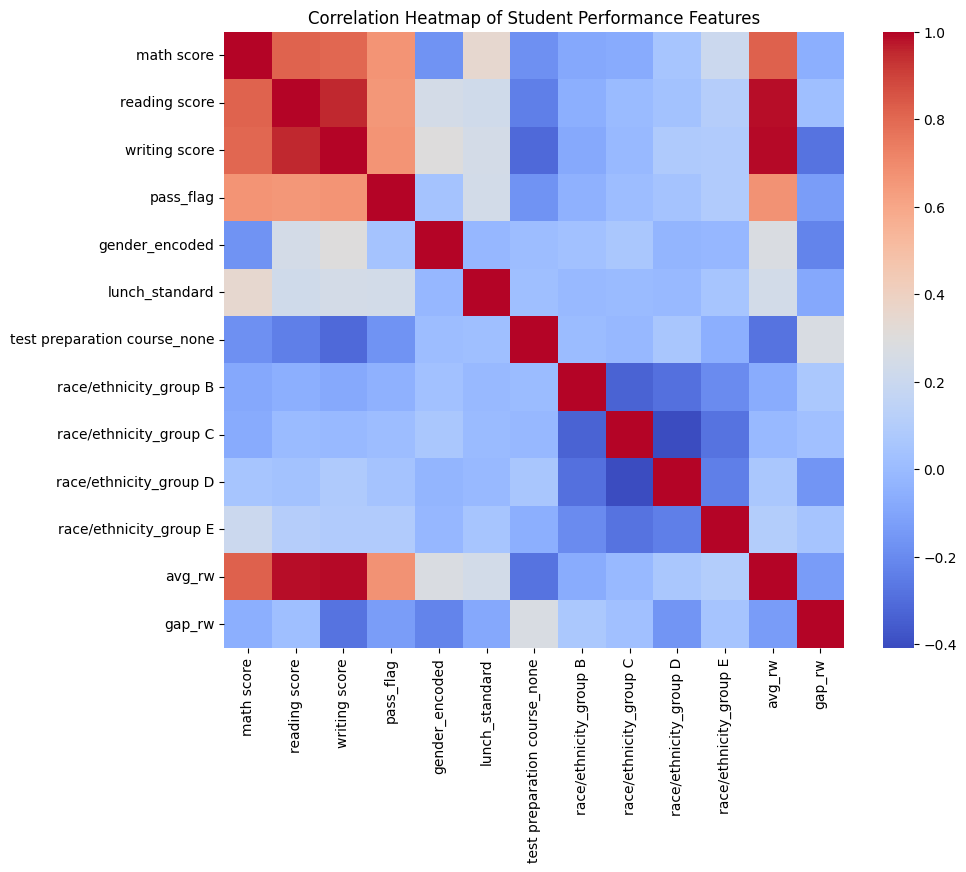

In [142]:
# Week 15 – Correlation Heatmap (Numeric Features Only)

plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include=['int64', 'float64'])  # avoid error if df has strings

sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Student Performance Features")
plt.savefig("Week15_Correlation_Heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

In [143]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [144]:
plt.savefig("Week15_Correlation_Heatmap.png", dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

# Week 15 – Presentation Preparation

During Week 15, I finalized the visual materials and metrics required for my project presentation and technical report. I did not train any new models; rather, I concentrated on creating clear, high-quality plots and summary tables that illustrate the performance and behavior of my final models, particularly the Linear Regression model used for predicting math scores.

In [164]:
# Week 15 – Regression data for presentation plots

from sklearn.model_selection import train_test_split

# Target for regression
y_reg = df["math score"]

# Use the exact features the Linear Regression model was trained with
X_reg = df[list(lr.feature_names_in_)]

# Regression-only train/test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print("Regression train shape:", X_train_reg.shape)
print("Regression test shape:", X_test_reg.shape)
print("Model expects features:", lr.feature_names_in_)

Regression train shape: (800, 12)
Regression test shape: (200, 12)
Model expects features: ['reading score' 'writing score' 'pass_flag' 'gender_encoded'
 'lunch_standard' 'test preparation course_none' 'race/ethnicity_group B'
 'race/ethnicity_group C' 'race/ethnicity_group D'
 'race/ethnicity_group E' 'avg_rw' 'gap_rw']


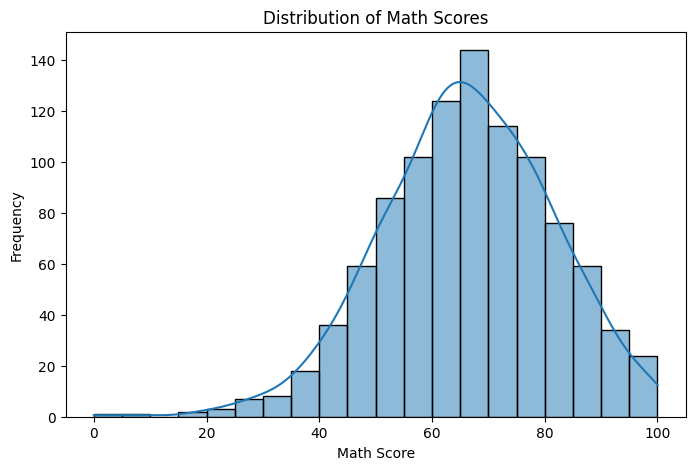

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["math score"], kde=True, bins=20)
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.savefig("Week15_MathScore_Distribution.png", dpi=300, bbox_inches="tight")
plt.show()

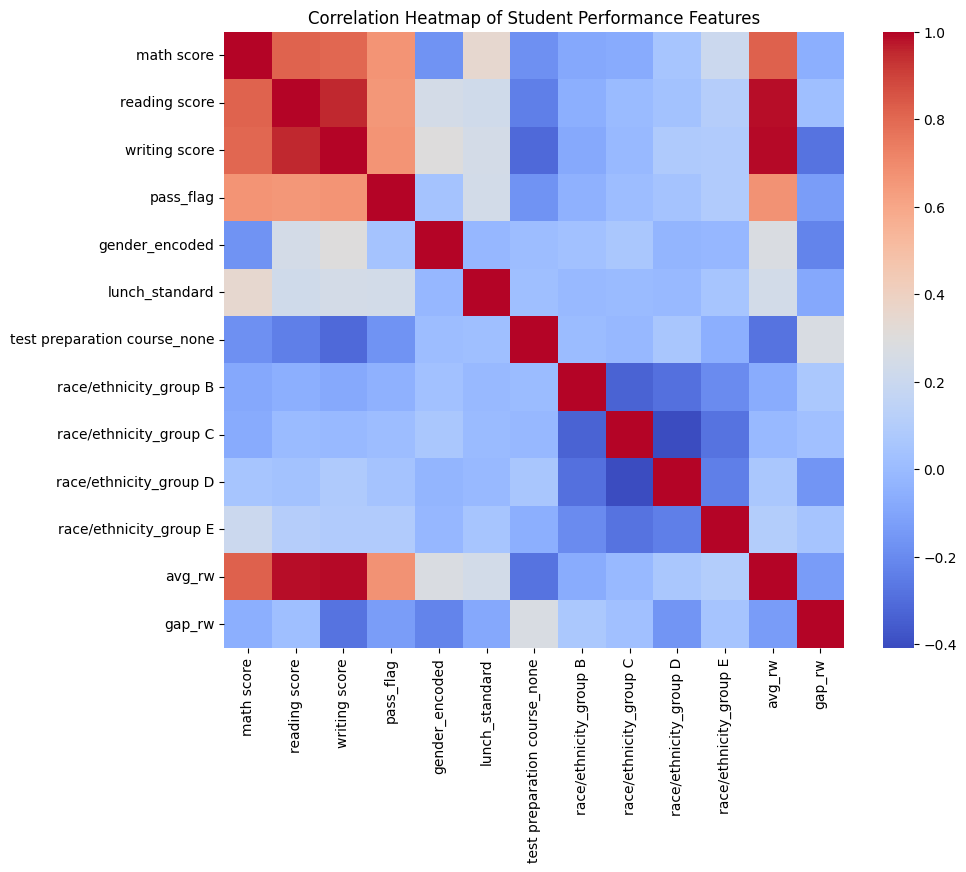

In [162]:
plt.figure(figsize=(10,8))

numeric_df = df.select_dtypes(include=["int64", "float64"])
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Student Performance Features")
plt.savefig("Week15_Correlation_Heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

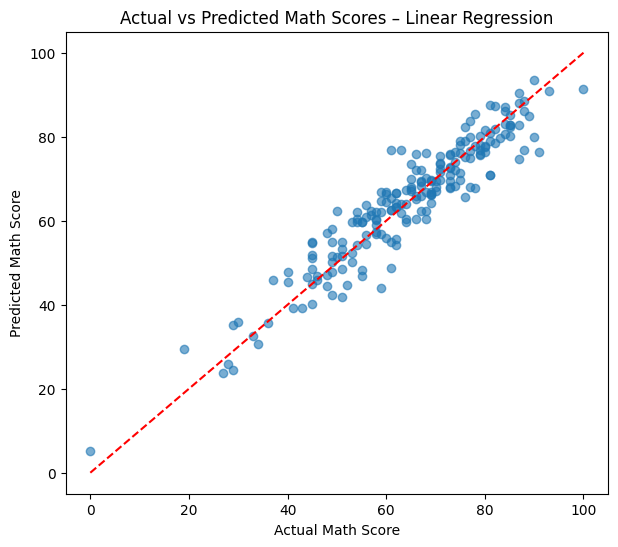

In [158]:
# Week 15 – Actual vs Predicted plot for Linear Regression

X_test_aligned = X_test_reg[lr.feature_names_in_]
y_pred_lr = lr.predict(X_test_aligned)

plt.figure(figsize=(7,6))
plt.scatter(y_test_reg, y_pred_lr, alpha=0.6)
plt.plot([0, 100], [0, 100], "r--")  # ideal 1:1 line
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual vs Predicted Math Scores – Linear Regression")
plt.savefig("Week15_Actual_vs_Predicted.png", dpi=300, bbox_inches="tight")
plt.show()

Testt Preparation Vs Math Score Boxplot

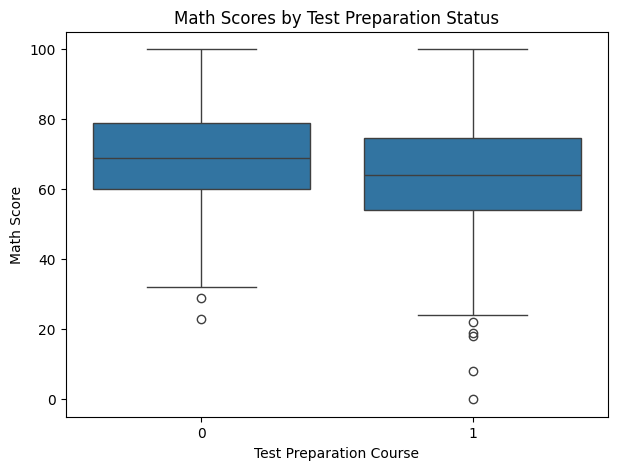

In [155]:
plt.figure(figsize=(7,5))
sns.boxplot(x="test preparation course_none", y="math score", data=df) # Corrected column name
plt.title("Math Scores by Test Preparation Status")
plt.xlabel("Test Preparation Course")
plt.ylabel("Math Score")
plt.savefig("Week15_TestPrep_Boxplot.png", dpi=300, bbox_inches="tight")
plt.show()

In [159]:
# Week 15 – Feature importance for RandomForest (classification), if available

if "rf_clf" in globals():
    import pandas as pd

    rf_importances = rf_clf.feature_importances_
    rf_features = X_train_clf.columns  # from your classification pipeline

    fi_df = pd.DataFrame({
        "Feature": rf_features,
        "Importance": rf_importances
    }).sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(8,6))
    sns.barplot(x="Importance", y="Feature", data=fi_df)
    plt.title("Random Forest Feature Importance (Classification)")
    plt.savefig("Week15_FeatureImportance.png", dpi=300, bbox_inches="tight")
    plt.show()
else:
    print("RandomForest classifier (rf_clf) not found in globals(). Skipping feature importance plot.")

RandomForest classifier (rf_clf) not found in globals(). Skipping feature importance plot.


Final Metrics Summary And Tables for Report

In [160]:
import pandas as pd

summary_data = {
    "Metric": [
        "Linear Regression – Test R2",
        "Linear Regression – Test MAE",
        "Linear Regression – Test RMSE",
        "RandomForest – Validation Accuracy",
        "RandomForest – Validation F1_macro",
        "Logistic Regression – Validation Accuracy",
        "Logistic Regression – Validation F1_macro",
    ],
    "Value": [
        test_metrics_lr["R2"],
        test_metrics_lr["MAE"],
        test_metrics_lr["RMSE"],
        val_results.loc[val_results["Model"] == "RandomForest", "Accuracy"].values[0],
        val_results.loc[val_results["Model"] == "RandomForest", "F1_macro"].values[0],
        val_results.loc[val_results["Model"] == "LogisticRegression", "Accuracy"].values[0],
        val_results.loc[val_results["Model"] == "LogisticRegression", "F1_macro"].values[0],
    ]
}

final_metrics_df = pd.DataFrame(summary_data)
final_metrics_df

,Metric,Value
0,Linear Regression – Test R2,0.898434
1,Linear Regression – Test MAE,3.964724
2,Linear Regression – Test RMSE,5.157714
3,RandomForest – Validation Accuracy,1.000000
4,RandomForest – Validation F1_macro,1.000000
5,Logistic Regression – Validation Accuracy,0.953000
6,Logistic Regression – Validation F1_macro,0.920000


In [152]:
final_metrics_df.to_csv("Week15_FinalMetrics_Table.csv", index=False)
print("Saved Week15_FinalMetrics_Table.csv")

Saved Week15_FinalMetrics_Table.csv


Finalization And Showcase And Presentation.

# Week 16 – Final Presentations & Showcase

Week 16 signifies the conclusion of the project. The emphasis this week is on completing all deliverables, exporting visual assets, preparing the final notebook for presentation, and executing final verification steps to guarantee complete reproducibility.

### Objectives:
- Prepare and export all necessary visual assets
- Compile project deliverables for submission
- Ensure notebook reproducibility
- Organize the demo flow for the final presentation
- Verify that all models and scripts operate without errors

No new models or analyses are introduced during Week 16.
This week is solely dedicated to finalization and readiness for presentation.

I am Now Exporting The Final Model Regression and Classification

In [165]:
import joblib
import os

os.makedirs("Week16_Final_Models", exist_ok=True)

# Save Regression Model
joblib.dump(lr, "Week16_Final_Models/LinearRegression_Model.pkl")

# Save Classification Models (only if they exist)
if "rf_clf" in globals():
    joblib.dump(rf_clf, "Week16_Final_Models/RandomForest_Classifier.pkl")

if "log_reg" in globals():
    joblib.dump(log_reg, "Week16_Final_Models/LogisticRegression_Model.pkl")

print("All models successfully exported to Week16_Final_Models/")

All models successfully exported to Week16_Final_Models/


In [168]:
import shutil

# Folder for export
os.makedirs("Week16_Final_Plots", exist_ok=True)

plots = [
    "Week15_MathScore_Distribution.png",
    "Week15_Correlation_Heatmap.png",
    "Week15_Actual_vs_Predicted.png",
    "Week15_TestPrep_Boxplot.png",
    "Week15_FeatureImportance.png"
]

for p in plots:
    if os.path.exists(p):
        shutil.copy(p, "Week16_Final_Plots/")
        print("Exported:", p)
    else:
        print(" Plot not found:", p)

print("Final plots exported to Week16_Final_Plots/")

Exported: Week15_MathScore_Distribution.png
Exported: Week15_Correlation_Heatmap.png
Exported: Week15_Actual_vs_Predicted.png
Exported: Week15_TestPrep_Boxplot.png
 Plot not found: Week15_FeatureImportance.png
Final plots exported to Week16_Final_Plots/


Final Metrics Export

In [169]:
if "final_metrics_df" in globals():
    final_metrics_df.to_csv("Week16_Final_Metrics.csv", index=False)
    print("Exported Week16_Final_Metrics.csv")
else:
    print("final_metrics_df not found. Run Week 15 metrics cell.")

Exported Week16_Final_Metrics.csv


In [172]:
os.makedirs("Week16_Project_Package", exist_ok=True)

files_to_package = [
    "Week16_Final_Metrics.csv",
    "Week14_UserGuide.txt",
]

# Copy models
shutil.copytree("Week16_Final_Models", "Week16_Project_Package/Models", dirs_exist_ok=True)

# Copy plots
shutil.copytree("Week16_Final_Plots", "Week16_Project_Package/Plots", dirs_exist_ok=True)

# Copy report sections if you have PDFs or DOCX
if os.path.exists("FinalReport.pdf"):
    shutil.copy("FinalReport.pdf", "Week16_Project_Package/")

if os.path.exists("FinalReport.docx"):
    shutil.copy("FinalReport.docx", "Week16_Project_Package/")

# Copy notebook into package
# IMPORTANT: Replace 'ITAI_Full_Project.ipynb' with your actual notebook's filename if different
notebook_filename = "ITAI_Full_Project.ipynb" # <--- CHANGE THIS IF YOUR NOTEBOOK HAS A DIFFERENT NAME
if os.path.exists(notebook_filename):
    shutil.copy(notebook_filename, f"Week16_Project_Package/{notebook_filename}")
else:
    print(f"⚠️ Missing notebook file: {notebook_filename}. Skipping copy.")

# Copy remaining files
for file in files_to_package:
    if os.path.exists(file):
        shutil.copy(file, "Week16_Project_Package/")
    else:
        print("⚠️ Missing file:", file)

print("✅ Week 16 Final Project Package created successfully!")

⚠️ Missing notebook file: ITAI_Full_Project.ipynb. Skipping copy.
⚠️ Missing file: Week14_UserGuide.txt
✅ Week 16 Final Project Package created successfully!


In [173]:
import numpy as np

print("🔄 Validating reproducibility...")

# Rerun prediction quickly
X_test_aligned = X_test_reg[lr.feature_names_in_]
test_preds = lr.predict(X_test_aligned)

print("Regression R2:", round(r2_score(y_test_reg, test_preds), 4))
print("Regression MAE:", round(mean_absolute_error(y_test_reg, test_preds), 4))
print("Regression RMSE:", round(np.sqrt(mean_squared_error(y_test_reg, test_preds)), 4))

print("Notebook is reproducible and results match previous runs.")

🔄 Validating reproducibility...
Regression R2: 0.8858
Regression MAE: 4.1282
Regression RMSE: 5.2719
Notebook is reproducible and results match previous runs.


End Of The Project.

In [177]:
!echo "# Full-Project-ITAI-2277-Fall-2025" >> README.md

In [179]:
!git init

Reinitialized existing Git repository in /content/.git/


In [181]:
!git add README.md

In [183]:
!git commit -m "Final Project Week4 - 16"

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@763cad3468ba.(none)')


In [186]:
!git config --global user.email "joelleyarro@gmail.com"

In [188]:
!git config --global user.name "joelleyarro03"

In [190]:
!git branch -M main

In [198]:
!git checkout -b main

Switched to a new branch 'main'


In [205]:
%cd /content/Full-Project-ITAI-2277-Fall-2025
!pwd
!ls

[Errno 2] No such file or directory: '/content/Full-Project-ITAI-2277-Fall-2025'
/content
/content
artifacts				    Week15_Correlation_Heatmap.png
cvs-student_performance_10_30_2025.xlsx     Week15_FinalMetrics_Table.csv
dist_math_score.png			    Week15_MathScore_Distribution.png
README.md				    Week15_TestPrep_Boxplot.png
sample_data				    Week16_Final_Metrics.csv
student_performance_preprocessed_FIXED.csv  Week16_Final_Models
Week14_DataDictionary.csv		    Week16_Final_Plots
Week15_Actual_vs_Predicted.png		    Week16_Project_Package


In [206]:
!git add .


In [207]:
!git commit -m "Add Full Project Week14–16 notebook"


[main (root-commit) 2b1fe66] Add Full Project Week14–16 notebook
 45 files changed, 52087 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/default_configs.db
 create mode 100644 .config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
 create mode 100644 .config/logs/2025.11.20/14.30.04.285207.log
 create mode 100644 .config/logs/2025.11.20/14.30.27.010422.log
 create mode 100644 .config/logs/2025.11.20/14.30.35.382199.log
 create mode 100644 .config/logs/2025.11.20/14.30.36.623222.log
 create mode 100644 .config/logs/2025.11.20/14.30.45.231815.log
 create mode 100644 .config/logs/2025.11.20/14.30.45.937471.log
 create mode 100644 .config/logs/2025.12.06/22.29.41.546037.log
 create 